![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [ ]:
housing = df[df['district']=="Чиланзарский"]
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


In [ ]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [ ]:
Y = housing['price'].to_numpy()
Y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

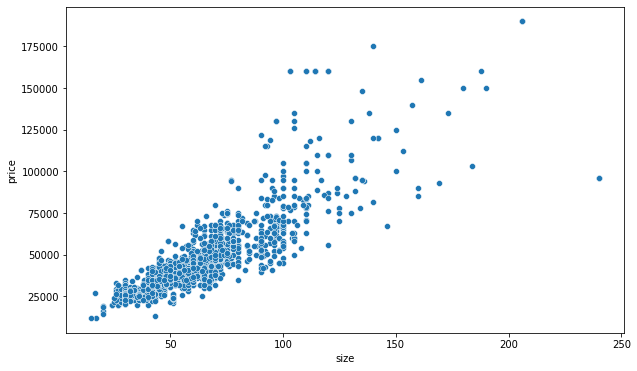

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

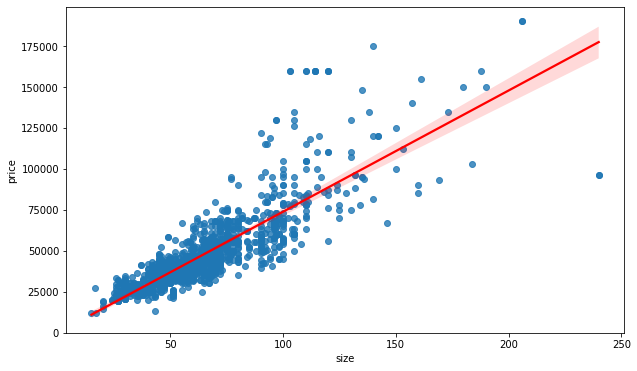

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [ ]:
x_mean = housing['size'].mean()
x_mean

61.90783415841584

In [ ]:
y_mean = housing['price'].mean()
y_mean

45617.487623762376

In [ ]:
k = sum((X-x_mean)*(Y-y_mean))/sum((X-x_mean)**2)
k

740.0264822713287

In [ ]:
b = y_mean - x_mean*k
b

-195.94911352690542

In [ ]:
x_test = housing.sample(10, random_state=10)['size'].to_numpy()
x_test

array([ 85.,  51.,  65.,  97.,  42., 115.,  76.,  51.,  43.,  30.])

In [ ]:
y_test = housing.sample(10, random_state=10)['price'].to_numpy()
y_test

array([ 52500.,  34800.,  45000.,  61692.,  40000., 110000.,  49000.,
        33000.,  35000.,  25500.])

In [ ]:
y_predict = k*x_test+b
y_predict

array([62706.30187954, 37545.40148231, 47905.77223411, 71586.61966679,
       30885.16314187, 84907.09634768, 56046.06353909, 37545.40148231,
       31625.18962414, 22004.84535461])

In [ ]:
mae = sum(abs(y_predict-y_test))/len(y_test)
mae

7842.126581585528

In [ ]:
rmse = np.sqrt(sum((y_predict-y_test)**2)/len(y_test))
rmse

10122.746859118699

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=10)

In [ ]:
from sklearn import linear_model
LR = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

LR.fit(x_train, y_train)
k = LR.coef_[0][0]
b = LR.intercept_[0]
print("k=", k)
print("b=", b)

k= 745.9271701053481
b= -537.935761877583


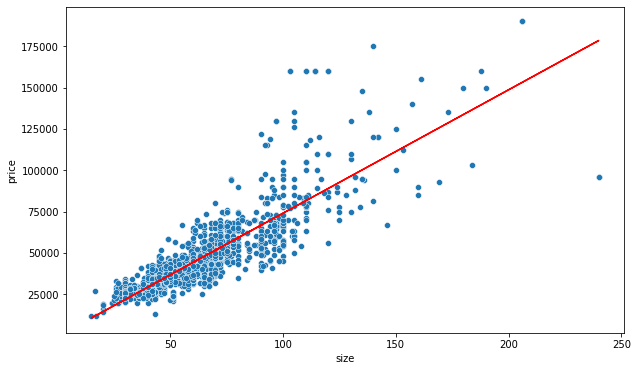

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, k*x_train+b, '-r')
plt.show()

In [ ]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [ ]:
y_predict = LR.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print("MAE = ", MAE)
print("RMSE = ", RMSE)

MAE =  8456.694705204836
RMSE =  15156.35247853945
